# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
df = pd.read_csv("car_data.csv")

In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
df.info()

In [ ]:
df.shape

(804, 12)

In [ ]:
df[['Mileage','Price']].corr()

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


In [ ]:
# df['transformed'] = np.sqrt(df['Mileage'])

In [ ]:
# df[['transformed','Price']].corr()

,transformed,Price
transformed,1.000000,-0.149316
Price,-0.149316,1.000000


In [ ]:
# df = df.drop(['transformed'],axis=1)

# Tasks: part-1
* Find the linear regression equation for mileage vs price.
* Chart the original data and the equation on the chart.
* Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
# converting into numpy array

X = df[["Mileage"]].values  # mileage
y = df["Price"].values  # price

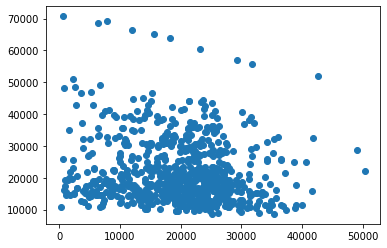

In [ ]:
plt.scatter(X,y)

In [ ]:
# splitting

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=77)

In [ ]:
X_train.shape, X_test.shape

((643, 1), (161, 1))

In [ ]:
# modelling

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression() # initialising linear regression. ie. y=mx+c

regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
# finding m & c:

print("m : ",regressor.coef_)
print("c : ",regressor.intercept_)

m :  [-0.15715352]
c :  24188.15184231118


(1) Linear Regression equation is:
* y = -0.157*x + 24188

In [ ]:
# prediction

y_pred = regressor.predict(X_test)

In [ ]:
# comparison

comp = pd.DataFrame({'actual':y_test,'predicted':y_pred})
comp.head()

,actual,predicted
0,30781.515633,21840.749744
1,38208.501023,19268.775269
2,16116.843916,24052.214049
3,25845.206115,18443.090686
4,22120.757765,19749.822188


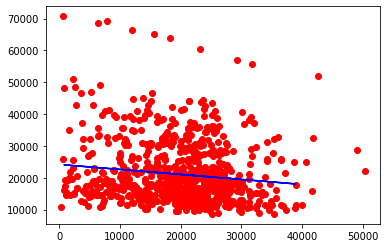

In [ ]:
#(2) Chart the original data and the equation on the chart

plt.scatter(X, y, color='red')
plt.plot(X_test, regressor.predict(X_test) , color='blue')

In [ ]:
#(3) r2 score:

from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.012014317871206326


Interpretation of the results:
* since r2 value is 0.01 (< 0.8), Linear Regression model is a poor model in this case

# Tasks: part-2:

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

In [ ]:
# converting into numpy array

X = df[["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"]].values  # mileage
y = df["Price"].values  # price

In [ ]:
# splitting

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=77)

In [ ]:
X_train.shape, X_test.shape

((643, 7), (161, 7))

In [ ]:
# scaling:
from sklearn.preprocessing import StandardScaler   # standrard scaling 
scaler = StandardScaler()         # initialise to a variable

scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train)   # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test)   # transform the test data 

In [ ]:
# modelling

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression() # initialising linear regression. ie. y=mx+c

regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
# finding m & c:
coeff_df = pd.DataFrame(regressor.coef_,["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"],                         
                        columns=['Coefficient'])

coeff_df

,Coefficient
Mileage,-0.164067
Cylinder,3352.604626
Liter,-373.537676
Doors,-1196.047057
Cruise,5978.760137
Sound,-1980.764531
Leather,2999.978116


In [ ]:
print("c : ",regressor.intercept_)

c :  6763.971177621399


In [ ]:
# prediction

y_pred = regressor.predict(X_test)

In [ ]:
# comparison

comp = pd.DataFrame({'actual':y_test,'predicted':y_pred})
comp.head()

,actual,predicted
0,30781.515633,25596.805704
1,38208.501023,28944.521742
2,16116.843916,21424.474073
3,25845.206115,15531.230313
4,22120.757765,23040.352631


In [ ]:
#(3) r2

from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.49526922534618356


In [ ]:
# selecting best features

from sklearn.feature_selection import RFE

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=2, step=1)    
selector = selector.fit(X_train, y_train)

list(zip(["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"],selector.support_))

[('Mileage', False),
 ('Cylinder', True),
 ('Liter', False),
 ('Doors', False),
 ('Cruise', True),
 ('Sound', False),
 ('Leather', False)]

Interpretation of the results:
* (1) Linear Regression equation is:
  -  predicted_price =  Mileage(-0.16) + Cylinder(3352)  + Liter(-373) + Doors(-1196) + Cruise(5978) +  Sound(-1980) + Leather(2999) + 6764
* (2) since r2 score 0.5 (<0.8), it is an average model
* (3) Cylinder and Cruise are the top 2 features determining the price of the car


# Tasks: hard mode

* (1) Research dummy variables in scikit-learn to see how to use the make, model, and body type.
* (2) Find the best combination of factors to predict price.

In [ ]:
print(df.Make.value_counts())

Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64


In [ ]:
print(dict(df.Model.value_counts()))

{'Malibu': 60, 'AVEO': 60, 'Cavalier': 60, 'Ion': 50, 'Cobalt': 50, '9_3 HO': 40, 'Vibe': 30, 'Bonneville': 30, 'Monte Carlo': 30, 'Lacrosse': 30, 'Impala': 30, 'Grand Prix': 30, '9_5': 30, 'Deville': 30, 'Lesabre': 20, 'Corvette': 20, '9_3': 20, '9_5 HO': 20, 'G6': 20, 'Grand Am': 20, 'Park Avenue': 20, 'Sunfire': 10, 'Century': 10, 'GTO': 10, 'Classic': 10, 'XLR-V8': 10, 'STS-V8': 10, 'STS-V6': 10, 'CTS': 10, 'CST-V': 10, 'L Series': 10, '9-2X AWD': 4}


In [ ]:
print(df.Type.value_counts())

Sedan          490
Coupe          140
Wagon           64
Hatchback       60
Convertible     50
Name: Type, dtype: int64


In [ ]:
# assigning dummy variables

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['Make'] = le.fit_transform(df["Make"])
print(df.Make.value_counts())

2    320
3    150
4    114
0     80
1     80
5     60
Name: Make, dtype: int64


In [ ]:
df['Model'] = le.fit_transform(df["Model"])
print(df.Model.value_counts())

24    60
5     60
9     60
20    50
12    50
2     40
30    30
6     30
25    30
22    30
19    30
18    30
3     30
14    30
23    20
13    20
1     20
4     20
15    20
17    20
26    20
29    10
10    10
16    10
11    10
31    10
28    10
27    10
8     10
7     10
21    10
0      4
Name: Model, dtype: int64


In [ ]:
df['Type']=le.fit_transform(df["Type"])
print(df.Type.value_counts())

3    490
1    140
4     64
2     60
0     50
Name: Type, dtype: int64


In [ ]:
df.corr()

,Price,Mileage,Make,Model,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,-0.131644,-0.026599,-0.163871,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,0.028632,-0.026810,-0.006547,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Make,-0.131644,0.028632,1.000000,-0.295619,-0.055916,-0.474727,-0.421690,-0.142858,-0.124232,-0.124200,-0.065295
Model,-0.026599,-0.026810,-0.295619,1.000000,0.021669,0.359248,0.347102,-0.027162,-0.088165,0.022747,-0.082459
Type,-0.163871,-0.006547,-0.055916,0.021669,1.000000,-0.067134,-0.112378,0.907163,-0.017463,-0.094508,-0.074930
Cylinder,0.569086,-0.029461,-0.474727,0.359248,-0.067134,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,-0.421690,0.347102,-0.112378,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,-0.142858,-0.027162,0.907163,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,-0.124232,-0.088165,-0.017463,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.124200,0.022747,-0.094508,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444


In [ ]:
#(2) Find the combination of the factors that is the best predictor for price

corr = df.corr()["Price"].sort_values(ascending=False)[1:]        # price column, excluding 1st row
abs_corr = abs(corr)

important_features = abs_corr[abs_corr>0.4]
print(important_features)

Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Name: Price, dtype: float64
